In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\shashi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\shashi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [2]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

print(train_data[0])

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0].shape
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
len(train_labels)

25000

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [10]:
len(y_train)

25000

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.optimizers.RMSprop(lr=0.001),
             loss=tf.losses.binary_crossentropy,
             metrics=[tf.metrics.binary_accuracy])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 24s 758ms/step - loss: 0.5766 - binary_accuracy: 0.7094 - val_loss: 0.3788 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3097 - binary_accuracy: 0.9037 - val_loss: 0.3081 - val_binary_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2232 - binary_accuracy: 0.9288 - val_loss: 0.3077 - val_binary_accuracy: 0.8739
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1781 - binary_accuracy: 0.9429 - val_loss: 0.2743 - val_binary_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1387 - binary_accuracy: 0.9598 - val_loss: 0.3060 - val_binary_accuracy: 0.8773
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1242 - binary_accuracy: 0.9603 - val_loss: 0.3205 - val_binary_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - l

In [15]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

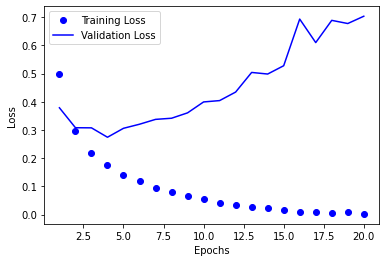

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

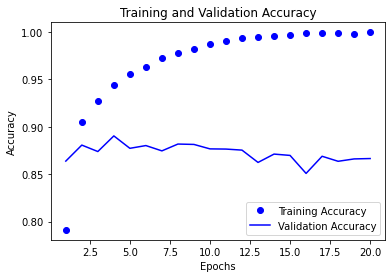

In [17]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def __init__():
        print('hello')

from tensorflow.keras.activations import relu, sigmoid
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=2)


model = Sequential()
model.add(Dense(16, activation=relu, input_shape=(10000,)))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer=tf.optimizers.RMSprop(lr=0.001),
             loss=tf.losses.binary_crossentropy,
             metrics=[tf.metrics.binary_accuracy])



history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[callback])

Epoch 1/20
30/30 [==============================] - 8s 107ms/step - loss: 0.5843 - binary_accuracy: 0.7165 - val_loss: 0.3855 - val_binary_accuracy: 0.8721
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3235 - binary_accuracy: 0.9044 - val_loss: 0.3082 - val_binary_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2303 - binary_accuracy: 0.9312 - val_loss: 0.2795 - val_binary_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1798 - binary_accuracy: 0.9442 - val_loss: 0.2755 - val_binary_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1410 - binary_accuracy: 0.9572 - val_loss: 0.2943 - val_binary_accuracy: 0.8837


In [19]:
history.history

{'loss': [0.5112974643707275,
  0.30709248781204224,
  0.22542712092399597,
  0.17988872528076172,
  0.14530931413173676],
 'binary_accuracy': [0.7898666858673096,
  0.9030666947364807,
  0.9263333082199097,
  0.9420666694641113,
  0.9545333385467529],
 'val_loss': [0.38554832339286804,
  0.3081980049610138,
  0.27945590019226074,
  0.2754548192024231,
  0.2942703366279602],
 'val_binary_accuracy': [0.8720999956130981,
  0.885699987411499,
  0.8916000127792358,
  0.8906999826431274,
  0.8837000131607056]}

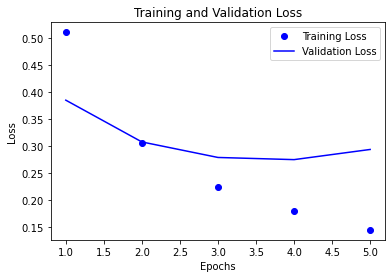

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

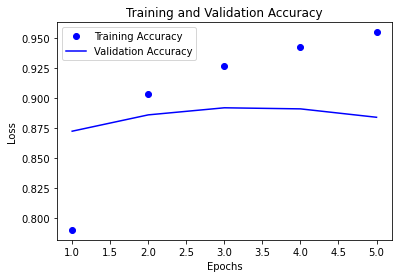

In [21]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Training the model for 5 epochs only

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import binary_crossentropy

model = Sequential()
model.add(Dense(16, activation=relu, input_shape=(10000,)))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer=RMSprop(lr=0.001),
             loss=binary_crossentropy,
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 4s 43ms/step - loss: 0.5693 - accuracy: 0.7325
Epoch 2/5
49/49 [==============================] - 2s 44ms/step - loss: 0.2824 - accuracy: 0.9106
Epoch 3/5
49/49 [==============================] - 2s 50ms/step - loss: 0.2018 - accuracy: 0.9305
Epoch 4/5
49/49 [==============================] - 2s 49ms/step - loss: 0.1711 - accuracy: 0.9411
Epoch 5/5
49/49 [==============================] - 2s 40ms/step - loss: 0.1439 - accuracy: 0.9521


In [23]:
result = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3087 - accuracy: 0.8812


In [24]:
result

[0.3086528778076172, 0.8811600208282471]

In [25]:
predictions = model.predict(x_test)

In [26]:
predictions

array([[0.18004307],
       [0.9999697 ],
       [0.8943604 ],
       ...,
       [0.11629531],
       [0.06407717],
       [0.63778657]], dtype=float32)

In [27]:
decoded_reviews = [' '.join([reverse_word_index.get(i-3,'?') for i in ele]) for ele in test_data]

In [28]:
import pandas as pd
result_df = pd.DataFrame({'review':decoded_reviews, 'sentiment':predictions.tolist(), 'true_label':test_labels})

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)
print(result_df.head(10))

                                                                                                review  \
0  ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances ...   
1  ? this film requires a lot of patience because it focuses on mood and character development the ...   
2  ? many animation buffs consider ? ? the great forgotten genius of one special branch of the art ...   
3  ? i generally love this type of movie however this time i found myself wanting to kick the scree...   
4  ? like some other people wrote i'm a die hard mario fan and i loved this game br br this game st...   
5  ? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disn...   
6  ? originally supposed to be just a part of a huge epic the year ? depicting the revolution of ? ...   
7  ? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to ...   
8  ? hollywood had a long love affair with bog

In [ ]:
import IPython
import kerastuner as kt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import binary_crossentropy


def model_builder(hp):
    hp_units = hp.Int('units', min_value=16, max_value=512, step=16)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])
    
    model = Sequential()
    model.add(Dense(units=hp_units, activation=relu, input_shape=(10000,)))
    model.add(Dense(units=hp_units, activation=relu))
    model.add(Dense(1, activation=sigmoid))

    
    model.compile(optimizer=RMSprop(lr=hp_learning_rate),
             loss=binary_crossentropy,
             metrics=['accuracy'])
    return model


tuner = kt.Hyperband(model_builder,
                    objective='val_accuracy',
                    max_epochs=10,
                    factor=3,
                    directory='.',
                    project_name='intro_kt')

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)
        

tuner.search(partial_x_train, 
             partial_y_train, 
             epochs = 20, 
             validation_data = (x_val, y_val), 
             callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 2)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")